Epoch 1/5: Train Loss: 0.4730, Train Acc: 82.98%, Test Loss: 0.3480, Test Acc: 87.60%
Epoch 2/5: Train Loss: 0.3076, Train Acc: 88.79%, Test Loss: 0.2975, Test Acc: 89.14%
Epoch 3/5: Train Loss: 0.2630, Train Acc: 90.40%, Test Loss: 0.2855, Test Acc: 89.72%
Epoch 4/5: Train Loss: 0.2327, Train Acc: 91.41%, Test Loss: 0.2625, Test Acc: 90.43%
Epoch 5/5: Train Loss: 0.2103, Train Acc: 92.13%, Test Loss: 0.2550, Test Acc: 90.61%


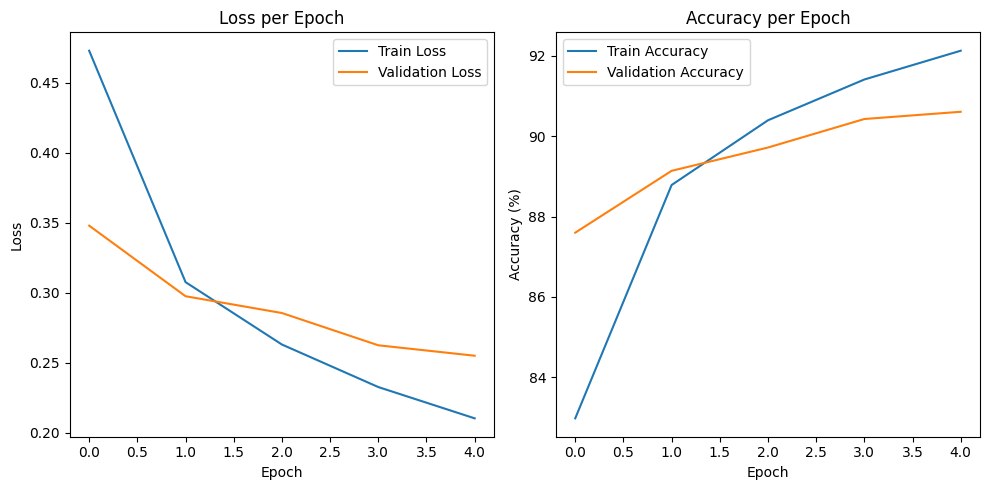

In [11]:
# Import the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Transform images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Download and prepare datasets
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for training and testing
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # First convolutional layer
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # Second convolutional layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Apply convolution, activation, and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply second convolution, activation, and pooling
        x = torch.flatten(x, 1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))  # Apply activation to the fully connected layer
        x = self.fc2(x)  # Compute the output
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Function to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=5):
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []}
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        total_train = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
            total_train += labels.size(0)
        
        # Validation phase
        model.eval()
        test_loss = 0
        test_correct = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                test_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs.data, 1)
                test_correct += (predicted == labels).sum().item()
                total_test += labels.size(0)
        
        # Calculate average losses and accuracy
        epoch_train_loss = train_loss / total_train
        epoch_train_acc = 100 * train_correct / total_train
        epoch_test_loss = test_loss / total_test
        epoch_test_acc = 100 * test_correct / total_test
        
        # Store metrics in the history dictionary
        history['train_loss'].append(epoch_train_loss)
        history['train_acc'].append(epoch_train_acc)
        history['test_loss'].append(epoch_test_loss)
        history['test_acc'].append(epoch_test_acc)
        
        print(f'Epoch {epoch + 1}/{epochs}: Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_acc:.2f}%')
    
    return history

# Function to plot the training and validation metrics
def plot_metrics(history):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['test_loss'], label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['test_acc'], label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Train and plot results
history = train_model(model, train_loader, test_loader, criterion, optimizer, epochs=5)
plot_metrics(history)